# Divvy Bike-Sharing Data Analysis

## Objective
There are two kinds of customers using Divvy's Bike-sharing service, those are casual riders (Customers who purchase single-ride or full-day passes) and members (customers who purchase annual memberships). The objective of this analysis is to design marketing strategies aimed at converting casual riders to annual members.

### Key Questions Addressed:
- Which stations are most popular among casual and member riders?
- How do trip durations differ between casual and member riders?
- What trends can be observed in monthly ride patterns?

### Tools Used:
- Python (pandas, matplotlib, numpy)


### Import packages

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the datasets

In [2]:
# Loading the csv files
df1=pd.read_csv(r"C:\Users\varun\Downloads\archive (5)\202103-divvy-tripdata.csv")
df2=pd.read_csv(r"C:\Users\varun\Downloads\archive (5)\202111-divvy-tripdata.csv")
df3=pd.read_csv(r"C:\Users\varun\Downloads\archive (5)\202109-divvy-tripdata.csv")
df4=pd.read_csv(r"C:\Users\varun\Downloads\archive (5)\202110-divvy-tripdata.csv")
df5=pd.read_csv(r"C:\Users\varun\Downloads\archive (5)\202108-divvy-tripdata.csv")
df6=pd.read_csv(r"C:\Users\varun\Downloads\archive (5)\202107-divvy-tripdata.csv")
df7=pd.read_csv(r"C:\Users\varun\Downloads\archive (5)\202106-divvy-tripdata.csv")
df8=pd.read_csv(r"C:\Users\varun\Downloads\archive (5)\202104-divvy-tripdata.csv")
df9=pd.read_csv(r"C:\Users\varun\Downloads\archive (5)\202105-divvy-tripdata.csv")
df10=pd.read_csv(r"C:\Users\varun\Downloads\archive (5)\202011-divvy-tripdata.csv")
df11=pd.read_csv(r"C:\Users\varun\Downloads\archive (5)\202012-divvy-tripdata.csv")
df12=pd.read_csv(r"C:\Users\varun\Downloads\archive (5)\202101-divvy-tripdata.csv")
df13=pd.read_csv(r"C:\Users\varun\Downloads\archive (5)\202102-divvy-tripdata.csv")

In [3]:
# Merge the datasets into one dataset using concat
bikes=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13])

In [4]:
bikes.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,TA1308000021,Broadway & Sheridan Rd,13323,41.968812,-87.657659,41.952833,-87.649993,casual
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,525,Chicago Ave & Sheridan Rd,E008,42.012701,-87.666058,42.050491,-87.677821,casual


# Information about the Dataset

In [5]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5738812 entries, 0 to 49621
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 613.0+ MB


In [6]:
# Checking for null values
bikes.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    675769
start_station_id      675876
end_station_name      725658
end_station_id        725735
start_lat                  0
start_lng                  0
end_lat                 5022
end_lng                 5022
member_casual              0
dtype: int64

In [7]:
# Checking for duplicates
bikes.duplicated().sum()

0

## Data Cleaning

In [8]:
# Removing unnecessary columns
bikes_data=bikes[['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'end_station_name',
       'member_casual']]
bikes_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,Stave St & Armitage Ave,casual
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,Central Park Ave & Bloomingdale Ave,casual
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,Halsted St & 35th St,casual
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,Broadway & Sheridan Rd,casual
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,Chicago Ave & Sheridan Rd,casual


In [9]:
# Checking for null values in the new dataframe
bikes_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    675769
end_station_name      725658
member_casual              0
dtype: int64

In [10]:
# Filling the missing station names with 'Unkonown'
bikes_data['start_station_name'].fillna('Unkonown',inplace=True)
bikes_data['end_station_name'].fillna('Unkonown',inplace=True)

C:\Users\varun\AppData\Local\Temp\ipykernel_10392\1985190910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_data['start_station_name'].fillna('Unkonown',inplace=True)
C:\Users\varun\AppData\Local\Temp\ipykernel_10392\1985190910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_data['end_station_name'].fillna('Unkonown',inplace=True)


In [11]:
bikes_data.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
member_casual         0
dtype: int64

In [12]:
# Checking for inconsistent names in the dataset
bikes_data['start_station_name'].unique()

array(['Humboldt Blvd & Armitage Ave', 'Shields Ave & 28th Pl',
       'Winthrop Ave & Lawrence Ave', 'Glenwood Ave & Touhy Ave',
       'State St & Kinzie St', 'Shore Dr & 55th St',
       'Clinton St & Lake St', 'Michigan Ave & Lake St',
       'Damen Ave & Madison St', 'Halsted St & 21st St',
       'McCormick Place', 'Leavitt St & Division St',
       'Lake Shore Dr & North Blvd', 'Lincoln Ave & Fullerton Ave',
       'Halsted St & Willow St', 'Wacker Dr & Washington St',
       'Clark St & Lake St', 'Calumet Ave & 18th St',
       'Michigan Ave & 14th St', 'Sedgwick St & Webster Ave',
       'Damen Ave & Grand Ave', 'Ritchie Ct & Banks St',
       'Southport Ave & Clybourn Ave', 'Lake Shore Dr & Monroe St',
       'Lakefront Trail & Bryn Mawr Ave', 'Calumet Ave & 21st St',
       'Wabash Ave & Adams St', 'Rush St & Cedar St',
       'LaSalle St & Jackson Blvd', 'Halsted St & North Branch St',
       'Rush St & Superior St', 'Franklin St & Jackson Blvd',
       'Canal St & Adams St

In [13]:
bikes_data['end_station_name'].unique()

array(['Stave St & Armitage Ave', 'Central Park Ave & Bloomingdale Ave',
       'Halsted St & 35th St', 'Broadway & Sheridan Rd',
       'Chicago Ave & Sheridan Rd', 'Lake Shore Dr & North Blvd',
       'Ellis Ave & 60th St', 'Franklin St & Jackson Blvd',
       'Racine Ave & Washington Blvd', 'Federal St & Polk St',
       'Halsted St & Clybourn Ave', 'Michigan Ave & 18th St',
       'Greenview Ave & Jarvis Ave', 'Ridge Blvd & Howard St',
       'Honore St & Division St', 'Sheffield Ave & Wellington Ave',
       'Morgan St & Lake St', 'Halsted St & Dickens Ave',
       'Clark St & Drummond Pl', 'South Shore Dr & 67th St',
       'Museum of Science and Industry', 'Jefferson St & Monroe St',
       'Montrose Harbor', 'Southport Ave & Clybourn Ave',
       'Lake Shore Dr & Monroe St', 'McClurg Ct & Erie St',
       'Racine Ave & Fullerton Ave', 'Lincoln Ave & Fullerton Ave',
       'State St & Kinzie St', 'Western Ave & Leland Ave',
       'Paulina St & 18th St', 'Burnham Harbor',
      

In [14]:
# Fixing the inconsistencies in start station names
bikes_data.loc[bikes_data['start_station_name']=='Orleans St & Chestnut St (NEXT Apts)','start_station_name']='Orleans St & Chestnut St'
bikes_data.loc[bikes_data['start_station_name']=='Elizabeth (May) St & Fulton St','start_station_name']='Elizabeth St & Fulton St'
bikes_data['start_station_name']=bikes_data['start_station_name'].apply(lambda x:x.replace('(Temp)',''))


C:\Users\varun\AppData\Local\Temp\ipykernel_10392\3984767522.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_data['start_station_name']=bikes_data['start_station_name'].apply(lambda x:x.replace('(Temp)',''))


In [15]:
# Fixing the inconsistencies in end station names
bikes_data.loc[bikes_data['end_station_name']=='Orleans St & Chestnut St (NEXT Apts)','end_station_name']='Orleans St & Chestnut St'
bikes_data.loc[bikes_data['start_station_name']=='Elizabeth (May) St & Fulton St','end_station_name']='Elizabeth St & Fulton St'
bikes_data['end_station_name']=bikes_data['start_station_name'].apply(lambda x:x.replace('(Temp)',''))


C:\Users\varun\AppData\Local\Temp\ipykernel_10392\1254950092.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_data['end_station_name']=bikes_data['start_station_name'].apply(lambda x:x.replace('(Temp)',''))


In [16]:
# Starting December 2020, docked_bike is written as classic_bike, so to make the data consistent, all docked_bike will be changed to classic_bike.
bikes_data.loc[bikes_data['rideable_type']=='docked_bike','rideable_type']='classic_bike'

In [17]:
bikes_data['rideable_type'].unique()

array(['classic_bike', 'electric_bike'], dtype=object)

In [18]:
# Removing any trailing spaces
bikes_data['end_station_name']=bikes_data['end_station_name'].str.strip()
bikes_data['start_station_name']=bikes_data['start_station_name'].str.strip()


C:\Users\varun\AppData\Local\Temp\ipykernel_10392\594275545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_data['end_station_name']=bikes_data['end_station_name'].str.strip()
C:\Users\varun\AppData\Local\Temp\ipykernel_10392\594275545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_data['start_station_name']=bikes_data['start_station_name'].str.strip()


In [19]:
# Casting the 'started_at' and 'ended_at' columns to datatime
bikes_data['ended_at']=pd.to_datetime(bikes_data['ended_at'])
bikes_data['started_at']=pd.to_datetime(bikes_data['started_at'])

C:\Users\varun\AppData\Local\Temp\ipykernel_10392\4064973945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_data['ended_at']=pd.to_datetime(bikes_data['ended_at'])
C:\Users\varun\AppData\Local\Temp\ipykernel_10392\4064973945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_data['started_at']=pd.to_datetime(bikes_data['started_at'])


In [20]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5738812 entries, 0 to 49621
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   member_casual       object        
dtypes: datetime64[ns](2), object(5)
memory usage: 350.3+ MB


In [21]:
# Create ride_length column, change unit of measurement to minutes
bikes_data['ride_length'] = (bikes_data['ended_at']-bikes_data['started_at'])
bikes_data['ride_length'] = (bikes_data['ride_length'].dt.total_seconds() / 60).round()
bikes_data.head()

C:\Users\varun\AppData\Local\Temp\ipykernel_10392\3629442003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_data['ride_length'] = (bikes_data['ended_at']-bikes_data['started_at'])
C:\Users\varun\AppData\Local\Temp\ipykernel_10392\3629442003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_data['ride_length'] = (bikes_data['ride_length'].dt.total_seconds() / 60).round()


,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,Humboldt Blvd & Armitage Ave,casual,4.0
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,Humboldt Blvd & Armitage Ave,casual,10.0
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,Shields Ave & 28th Pl,casual,16.0
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,Winthrop Ave & Lawrence Ave,casual,29.0
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,Glenwood Ave & Touhy Ave,casual,18.0


#### Handling Outliers
Based on the output above, there are another issues with the data:

- There are data points where the ended_at is smaller the started_at making our ride_length value negative, which can be caused by faulty system or something and therefore, those data should be dropped.
- There are outliers in the data which can skew our analysis.

In [22]:
bikes_data['ride_length'].min(),bikes_data['ride_length'].max()

(-29050.0, 55944.0)

In [23]:
q1=bikes_data['ride_length'].quantile(0.25)
q3=bikes_data['ride_length'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
upper=q3+1.5*IQR
print(lower,upper)

-15.5 44.5


In [24]:
# Since ride_length cannotbe negative, rides lengths below zero are assigned with 0
bikes_data.loc[bikes_data['ride_length']<lower,'ride_length']=0
bikes_data.loc[bikes_data['ride_length']>upper,'ride_length']=upper

There are rides with ride length less than 2 minutes. The customer might have a change of mind and docked the bike back to the station.Those rows can be dropped assuming that it occurred because the customers cancelled the ride and docked the bike back to the station.

In [25]:
bikes_data=bikes_data.loc[(bikes_data['ride_length']>2)]

In [26]:
# Creating new 'Day' and 'Month' columns to analyze customer behaviour
bikes_data['Day']=bikes_data['started_at'].dt.strftime('%A')
bikes_data['Month']=bikes_data['started_at'].dt.strftime('%B')
bikes_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,Day,Month
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,Humboldt Blvd & Armitage Ave,casual,4.0,Tuesday,March
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,Humboldt Blvd & Armitage Ave,casual,10.0,Sunday,March
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,Shields Ave & 28th Pl,casual,16.0,Thursday,March
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,Winthrop Ave & Lawrence Ave,casual,29.0,Thursday,March
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,Glenwood Ave & Touhy Ave,casual,18.0,Sunday,March


# Exploratory Data Analysis

1. What is the Monthly average of ride length for casual riders and members?

In [27]:
bikes_data['Month']=pd.Categorical(bikes_data['Month'],categories=['January','February','March','April','May','June','July','August',
                                                                  'September','October','November','December'],ordered=True)
monthly_average_ride_lengths=bikes_data.groupby(['member_casual','Month',]).agg({'ride_length':'mean'}).reset_index()

In [28]:
monthly_average_ride_lengths

,member_casual,Month,ride_length
0,casual,January,17.048571
1,casual,February,20.906409
2,casual,March,22.880070
3,casual,April,22.525243
4,casual,May,22.944010
5,casual,June,21.785130
6,casual,July,21.131639
7,casual,August,20.541035
8,casual,September,19.906753
9,casual,October,18.391263


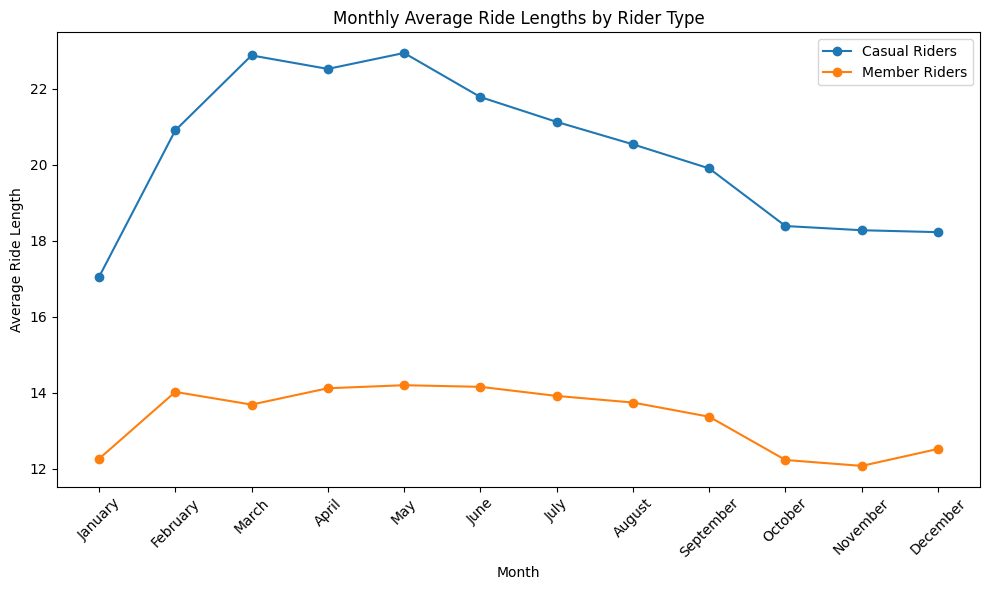

In [29]:

casual_df = monthly_average_ride_lengths[monthly_average_ride_lengths['member_casual'] == 'casual']
member_df = monthly_average_ride_lengths[monthly_average_ride_lengths['member_casual'] == 'member']

# Plot
plt.figure(figsize=(10, 6))

plt.plot(casual_df['Month'], casual_df['ride_length'], label='Casual Riders', marker='o')
plt.plot(member_df['Month'], member_df['ride_length'], label='Member Riders', marker='o')

# Customize the plot
plt.title('Monthly Average Ride Lengths by Rider Type')
plt.xlabel('Month')
plt.ylabel('Average Ride Length')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Which months are the busiest periods

In [30]:
monthly_rides=bikes_data.groupby(['member_casual','Month']).agg({'ride_id':'count'}).reset_index()
monthly_rides=monthly_rides.rename(columns={'ride_id':'total_rides'})
monthly_rides.head()

,member_casual,Month,total_rides
0,casual,January,17562
1,casual,February,9814
2,casual,March,82206
3,casual,April,133504
4,casual,May,250267


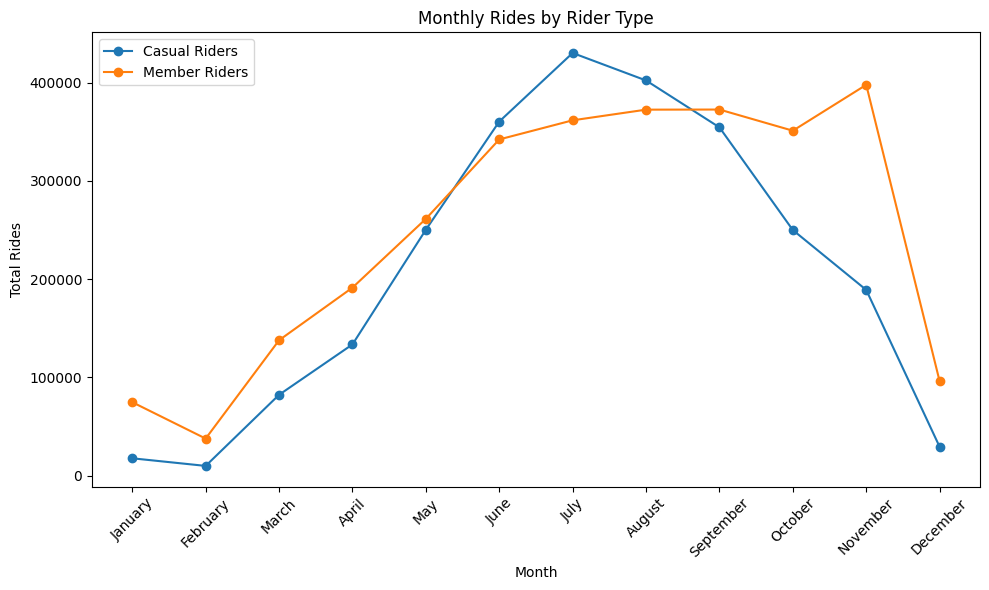

In [31]:
casual_df = monthly_rides[monthly_rides['member_casual'] == 'casual']
member_df = monthly_rides[monthly_rides['member_casual'] == 'member']
monthly_rides
# Plot
plt.figure(figsize=(10, 6))

plt.plot(casual_df['Month'], casual_df['total_rides'], label='Casual Riders', marker='o')
plt.plot(member_df['Month'], member_df['total_rides'], label='Member Riders', marker='o')

# Customize the plot
plt.title('Monthly Rides by Rider Type')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


What are the most busiest periods in a Day?

In [32]:
bikes_data['Time']=bikes_data['started_at'].dt.time
bikes_data['Minutes'] = bikes_data['Time'].apply(lambda t: t.hour * 60 + t.minute)

bins = list(range(0, 1441, 240))  
labels = [f'{i}-{i+4}' for i in range(0, 24, 4)]

# Bin the time data into 4-hour intervals
bikes_data['Time Bin'] = pd.cut(bikes_data['Minutes'], bins=bins, labels=labels, right=False)
bikes_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,ride_length,Day,Month,Time,Minutes,Time Bin
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,Humboldt Blvd & Armitage Ave,casual,4.0,Tuesday,March,08:32:30,512,8-12
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,Humboldt Blvd & Armitage Ave,casual,10.0,Sunday,March,01:26:28,86,0-4
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,Shields Ave & 28th Pl,casual,16.0,Thursday,March,21:17:29,1277,20-24
3,994D05AA75A168F2,classic_bike,2021-03-11 13:26:42,2021-03-11 13:55:41,Winthrop Ave & Lawrence Ave,Winthrop Ave & Lawrence Ave,casual,29.0,Thursday,March,13:26:42,806,12-16
4,DF7464FBE92D8308,classic_bike,2021-03-21 09:09:37,2021-03-21 09:27:33,Glenwood Ave & Touhy Ave,Glenwood Ave & Touhy Ave,casual,18.0,Sunday,March,09:09:37,549,8-12


In [33]:
busy_periods=bikes_data.groupby(['member_casual','Time Bin']).agg({'ride_id':'count'}).reset_index()
busy_periods.columns=['member_casual','Time Bin','total_rides']
busy_periods

,member_casual,Time Bin,total_rides
0,casual,0-4,128469
1,casual,4-8,92845
2,casual,8-12,378424
3,casual,12-16,707441
4,casual,16-20,814262
5,casual,20-24,387474
6,member,0-4,69079
7,member,4-8,261908
8,member,8-12,574551
9,member,12-16,729927


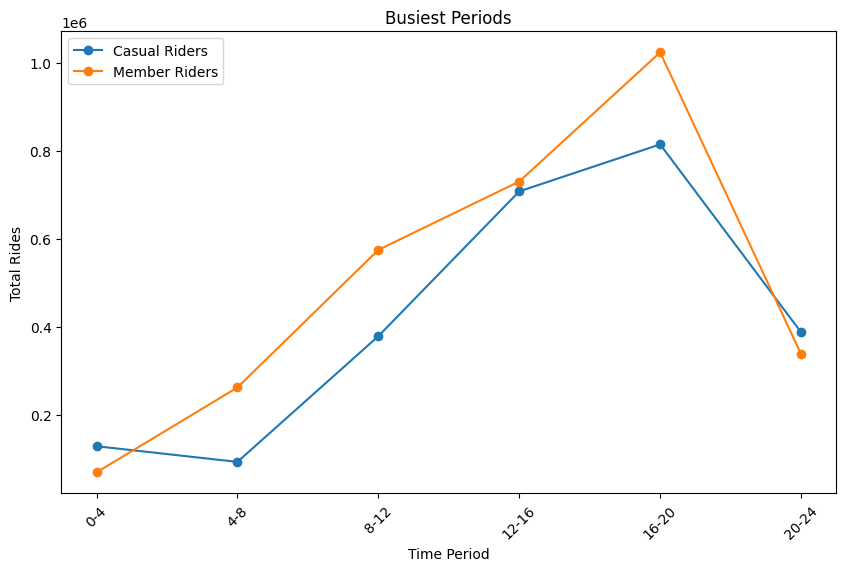

In [34]:
casual_df = busy_periods[busy_periods['member_casual'] == 'casual']
member_df = busy_periods[busy_periods['member_casual'] == 'member']
# Plot
plt.figure(figsize=(10, 6))

plt.plot(casual_df['Time Bin'], casual_df['total_rides'], label='Casual Riders', marker='o')
plt.plot(member_df['Time Bin'], member_df['total_rides'], label='Member Riders', marker='o')

# Customize the plot
plt.title('Busiest Periods')
plt.xlabel('Time Period')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.legend()

Which days the customers prefer more to rent a bike?

In [35]:
bikes_data['Day']=pd.Categorical(bikes_data['Day'],categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],ordered=True)
daily_rides=bikes_data.groupby(['member_casual','Day']).agg({'ride_id':'count'}).reset_index()
daily_rides=daily_rides.rename(columns={'ride_id':'total_rides'})
daily_rides.head()

,member_casual,Day,total_rides
0,casual,Monday,285153
1,casual,Tuesday,272723
2,casual,Wednesday,273505
3,casual,Thursday,280750
4,casual,Friday,358129


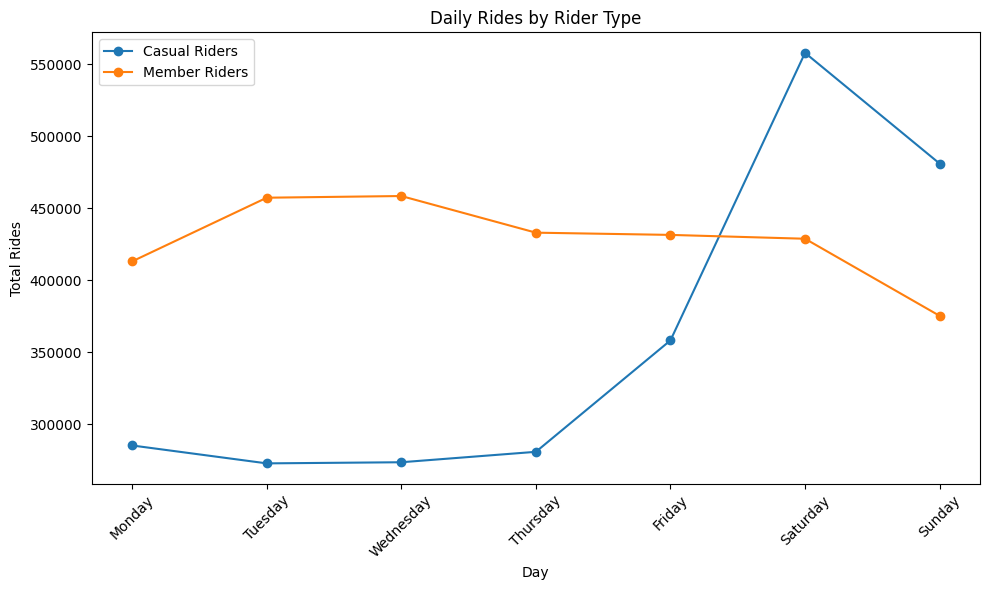

In [36]:
casual_df = daily_rides[daily_rides['member_casual'] == 'casual']
member_df = daily_rides[daily_rides['member_casual'] == 'member']
monthly_rides
# Plot
plt.figure(figsize=(10, 6))

plt.plot(casual_df['Day'], casual_df['total_rides'], label='Casual Riders', marker='o')
plt.plot(member_df['Day'], member_df['total_rides'], label='Member Riders', marker='o')

# Customize the plot
plt.title('Daily Rides by Rider Type')
plt.xlabel('Day')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


What is the most preferred bike among the customers?

In [37]:
preferred_bike=(bikes_data['rideable_type'].value_counts()/len(bikes_data)*100).round(2)
preferred_bike

rideable_type
classic_bike     64.74
electric_bike    35.26
Name: count, dtype: float64

Text(0, 0.5, '')

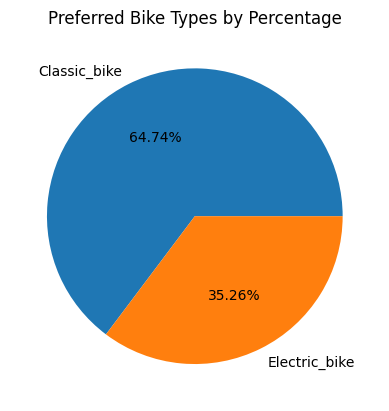

In [38]:
preferred_bike.plot(kind='pie',autopct='%.2f%%',labels=['Classic_bike','Electric_bike'],title='Preferred Bike Types by Percentage',ylabel=None).set_ylabel('')

In [39]:
member_riders=bikes_data.loc[bikes_data['member_casual']=='member']
casual_riders=bikes_data.loc[bikes_data['member_casual']=='casual']
casuals_preferred_bike=(casual_riders['rideable_type'].value_counts()/len(bikes_data)*100).round(2)
members_preferred_bike=(member_riders['rideable_type'].value_counts()/len(bikes_data)*100).round(2)

Text(0, 0.5, '')

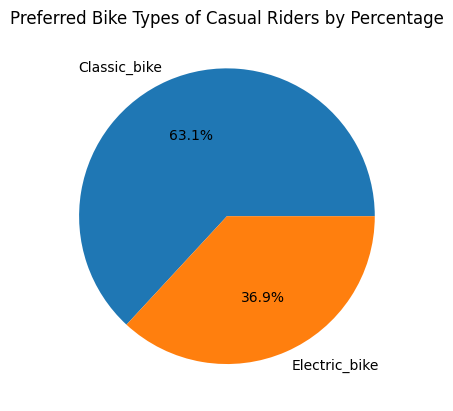

In [40]:
casuals_preferred_bike.plot(kind='pie',autopct='%.1f%%',labels=['Classic_bike','Electric_bike'],title='Preferred Bike Types of Casual Riders by Percentage',ylabel=None).set_ylabel('')

Text(0, 0.5, '')

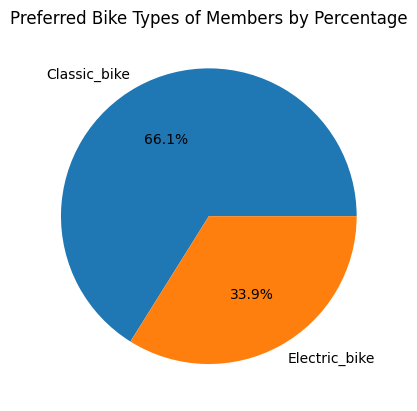

In [41]:
members_preferred_bike.plot(kind='pie',autopct='%.1f%%',labels=['Classic_bike','Electric_bike'],title='Preferred Bike Types of Members by Percentage',ylabel=None).set_ylabel('')

What are the most often visited stations?

<Axes: title={'center': 'Most Visited Start Stations'}, xlabel='Station Name', ylabel='Frequency of visits'>

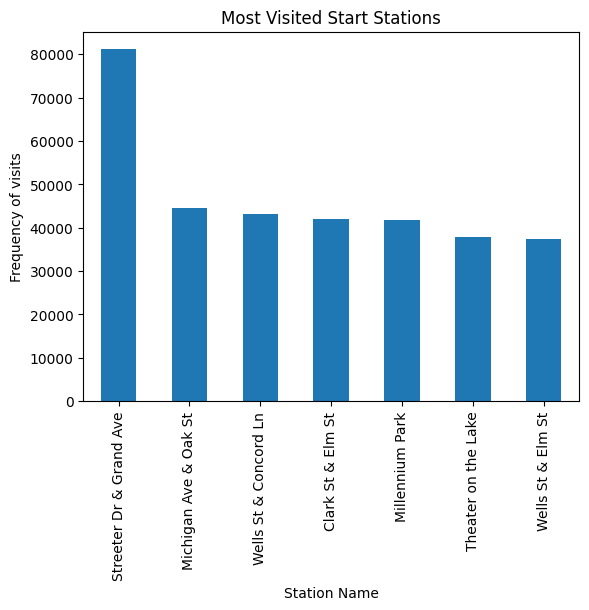

In [42]:
bikes_data['start_station_name'].value_counts()[1:8].plot(kind='bar',xlabel='Station Name',ylabel='Frequency of visits',title='Most Visited Start Stations')

<Axes: title={'center': 'Most Visited Start Stations of Casual Riders'}, xlabel='Station Name', ylabel='Frequency of visits'>

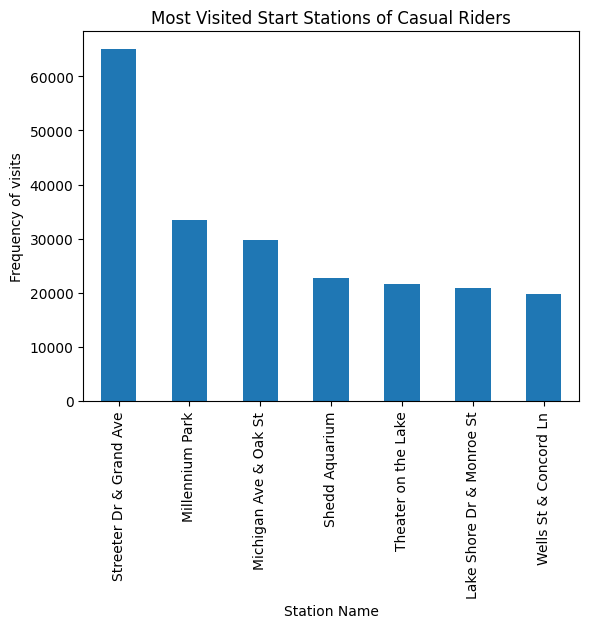

In [43]:
casual_riders['start_station_name'].value_counts()[1:8].plot(kind='bar',xlabel='Station Name',ylabel='Frequency of visits',title='Most Visited Start Stations of Casual Riders')

<Axes: title={'center': 'Most Visited Start Stations of Members'}, xlabel='Station Name', ylabel='Frequency of visits'>

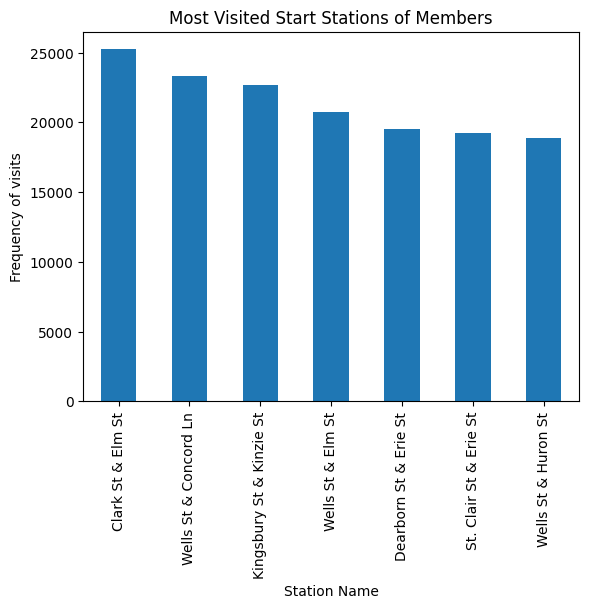

In [44]:
member_riders=bikes_data.loc[bikes_data['member_casual']=='member']
member_riders['start_station_name'].value_counts()[1:8].plot(kind='bar',xlabel='Station Name',ylabel='Frequency of visits',title='Most Visited Start Stations of Members')


### Conclusion:
From the analysis, it's clear that:
- **Casual riders tend to use Divvy more on weekends**, suggesting they may be leisure users rather than commuters.
- **Casual riders tend to rent bikes more during 4PM - 8PM**, suggesting that the casual riders prefer to ride more in the evening
- **Casual riders also take longer trips compared to members**, which can be leveraged in marketing to emphasize unlimited ride benefits for members.
- **Certain stations are more popular among casual riders**, which can be targeted for membership promotions.

### Recommendations:
- Offer special weekend promotions or discounted memberships to casual riders, particularly on the days they ride the most.
- Use advertising at the most popular start stations for casual riders to promote membership.
- Highlight the benefits of becoming a member, such as unlimited ride time, to encourage longer riders to convert to membership.
- Most of the riders prefer classic bike. So, offering discounted memberships to casual riders on classic bike might help.
- Introduce a seasonal discount for new members, such as a summer promotion where purchasing a 12-month membership includes an extra month free.
- Provide a special discount on memberships for existing members who refer others to join.
